In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")


sns.set()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Data Loading

In [55]:
raw_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv', index_col='Id')
raw_data.reset_index(drop=True, inplace=True)

In [56]:
raw_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [57]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# Utils

## Encoder

In [58]:
# Nominal Features
features_nom = ["MSSubClass", "MSZoning", "Street", "Alley", "LandContour", "LotConfig", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating", "CentralAir", "GarageType", "MiscFeature", "SaleType", "SaleCondition"]


# Ordinal Features
# The ordinal (ordered) categorical features 
# Pandas calls the categories "levels"
five_levels = ["Po", "Fa", "TA", "Gd", "Ex"]
ten_levels = list(range(10))

ordered_levels = {
    "OverallQual": ten_levels,
    "OverallCond": ten_levels,
    "ExterQual": five_levels,
    "ExterCond": five_levels,
    "BsmtQual": five_levels,
    "BsmtCond": five_levels,
    "HeatingQC": five_levels,
    "KitchenQual": five_levels,
    "FireplaceQu": five_levels,
    "GarageQual": five_levels,
    "GarageCond": five_levels,
    "PoolQC": five_levels,
    "LotShape": ["Reg", "IR1", "IR2", "IR3"],
    "LandSlope": ["Sev", "Mod", "Gtl"],
    "BsmtExposure": ["No", "Mn", "Av", "Gd"],
    "BsmtFinType1": ["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "BsmtFinType2": ["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "Functional": ["Sal", "Sev", "Maj1", "Maj2", "Mod", "Min2", "Min1", "Typ"],
    "GarageFinish": ["Unf", "RFn", "Fin"],
    "PavedDrive": ["N", "P", "Y"],
    "Utilities": ["NoSeWa", "NoSewr", "AllPub"],
    "CentralAir": ["N", "Y"],
    "Electrical": ["Mix", "FuseP", "FuseF", "FuseA", "SBrkr"],
    "Fence": ["MnWw", "GdWo", "MnPrv", "GdPrv"],
}

# Add a None level for missing values
ordered_levels = {key: ["None"] + value for key, value in
                  ordered_levels.items()}

# Continuous Features
features_con = [
    'LotFrontage',     # Linear feet of street connected to property
    'LotArea',         # Lot size in square feet
    'MasVnrArea',      # Masonry veneer area in square feet
    'BsmtFinSF1',      # Type 1 finished square feet
    'BsmtFinSF2',      # Type 2 finished square feet
    'BsmtUnfSF',       # Unfinished square feet of basement area
    'TotalBsmtSF',     # Total square feet of basement area
    '1stFlrSF',        # First floor square feet
    '2ndFlrSF',        # Second floor square feet
    'LowQualFinSF',    # Low quality finished square feet
    'GrLivArea',       #Above grade (ground) living area square feet
    'GarageArea',      # Garage area in square feet
    'WoodDeckSF',      # Wood deck area in square feet
    'OpenPorchSF',     # Open porch area in square feet
    'EnclosedPorch',   # Enclosed porch area in square feet
    '3SsnPorch',       # Three season porch area in square feet
    'ScreenPorch',     # Screen porch area in square feet
    'PoolArea',        # Pool area in square feet
    'MiscVal',         # Value of miscellaneous feature
]

In [59]:
def encode(X, y=None):
    # Nominal categories
    for nominal in features_nom:
        X[nominal] = X[nominal].astype("category")
        # Add a None category for missing values
        if "None" not in X[nominal].cat.categories:
            X[nominal] = X[nominal].cat.add_categories("None")
    
    # Ordinal categories
    for ordinal, levels in ordered_levels.items():
        X[ordinal] = X[ordinal].astype(CategoricalDtype(levels, ordered=True))

    # Continuous features
    for name in features_con:
        X[name] = X[name].astype("float64")

    # Converting categorical features to its code
    for name in X.select_dtypes(["category"]):
        X[name] = X[name].cat.codes

    # Changing SalePrice dtype to float64
    if y is not None:
        y = y.astype('float64')
        return X, y

    return X

## Imputer

In [60]:
def impute(X):
    for numerical in X.select_dtypes("number"):
        X[numerical] = X[numerical].fillna(0)
    for categorical in X.select_dtypes("category"):
        X[categorical] = X[categorical].fillna("None")
    return X

## Dataset scorer

In [61]:
def score_dataset(X, y, model=GradientBoostingRegressor()):
    log_y = np.log(y)
    score = cross_val_score(
        model, X, log_y, cv=5, scoring="neg_mean_squared_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

# Data Cleaning

## Handling missing values

This section will focus on deciding between whether the data is NaN because simply it doesn't exist (NE) or wasn't recorded (NR).

### Numerical

In [62]:
numerical_null = raw_data.select_dtypes(['int64', 'float64']).isnull().sum()
numerical_null[numerical_null > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [63]:
raw_data[['MasVnrType', 'MasVnrArea']][raw_data.MasVnrArea.isnull()]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [64]:
raw_data.MasVnrArea[raw_data.MasVnrArea.isnull()] = 0

In [65]:
raw_data['GarageYrBlt'].fillna(0, inplace=True)

* LotFrontage: NR
* MasVnrArea: NE (because its MasVnrType are all NaN). proceed to replace it with 0
* GarageYrBlt: NE (all garage-related var has 81 misval--not exists)

### Categorical

In [66]:
categorical_null = raw_data.select_dtypes(['object']).isnull().sum()
categorical_null[categorical_null > 0]

Alley           1369
MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [67]:
raw_data.MasVnrType[raw_data.MasVnrArea == 0].isnull().sum()

867

In [68]:
raw_data.MasVnrType[raw_data.MasVnrArea > 0].isnull().sum()

5

***MasVnrType: 867 NE; 5 NR***

In [69]:
raw_data.loc[:, ['BsmtCond', 'BsmtExposure']][(raw_data.BsmtExposure.isnull()) & (raw_data.BsmtCond.notnull())]

,BsmtCond,BsmtExposure
948,TA,NaN


In [70]:
raw_data.loc[948, 'BsmtExposure'] = raw_data.BsmtExposure.mode()[0]
raw_data.loc[948, 'BsmtExposure']

'No'

***BsmtExposure: 37 NE; 1 NR***

All data that has a basement always has its BsmntExposure, but only this data point has a basement but not BsmtExposure. It will, then, be replaced with BsmtExposure mode-'No': No Exposure.

In [71]:
raw_data.loc[:, ['BsmtFinSF2', 'BsmtFinType2']][(raw_data.BsmtFinSF2 > 0) & (raw_data.BsmtFinType2.isnull())]

,BsmtFinSF2,BsmtFinType2
332,479,NaN


In [72]:
raw_data.loc[332, 'BsmtFinType2'] = raw_data.BsmtFinType2[raw_data.BsmtFinSF2 > 0].mode()[0]
raw_data.loc[332, 'BsmtFinType2']

'Rec'

***BsmtFinType2: 37 NE; 1 NR***

For BsmtFinType2, the mode is indeed 'Unf', but isn't reasonable to impute it with 'Unf' when its BsmtFinSF2 is > 0. ('Unf' is for BsmtFinSF2 == 0)

In [73]:
raw_data.FireplaceQu[raw_data.Fireplaces == 0].isnull().sum()

690

***FireplaceQu: 690 NE***

In [74]:
raw_data.PoolArea[raw_data.PoolArea > 0]

197     512
810     648
1170    576
1182    555
1298    480
1386    519
1423    738
Name: PoolArea, dtype: int64

***PoolQC: 1453 NE***

There's only 7 non-null values in the variable PoolQC because only 7 rows have PoolArea > 0, meaning that simply only 7 houses in the data have a pool. Therefore, the 0s in PoolArea will be left as-is, while the NaN in PoolQC will be converted to the lowest ordinal category-0.

In [75]:
raw_data.MiscFeature[raw_data.MiscVal > 0].isnull().sum()

0

***MiscFeature: 1406 NE***

* Alley: *potentially* NE (the variable has 'None' category)
* MasVnrType: 867 NE; 5 NR
* BsmtQual: NE
* BsmtCond: NE
* BsmtExposure: 37 NE; 1 NR
* BsmtFinType1: NE
* BsmtFinType2: 37 NE; 1 NR
* Electrical: NR
* FireplaceQu: NE (Fireplaces also has 690 0s)
* GarageType: NE
* GarageFinish: NE
* GarageQual: NE
* GarageCond: NE
* PoolQC: NE
* Fence: *potentially* NE (the variable has 'None' category)
* MiscFeature:  NE (MiscVal has no > 0 with NaN MiscFeature)

In [76]:
experimential_data = raw_data.copy()
train_data = raw_data.copy()

In [77]:
X = experimential_data.drop('SalePrice', axis=1)
y = experimential_data.SalePrice
X_encoded, y_encoded = encode(X, y)

In [78]:
X_imputed = impute(X_encoded)

In [79]:
data = X_imputed.join(y_encoded)

# Data Visualization

uncomment to show

## Target

In [80]:
# sns.distplot(data.SalePrice)

## Features

### Categorical

In [81]:
# categoricals = data.select_dtypes(['int8'])
# categoricals

***Nominal***

In [82]:
# sns.set(style="whitegrid")

# # Define number of rows and columns for the subplots grid
# num_cols = 3  # Number of plots per row
# num_rows = (len(features_nom) + num_cols - 1) // num_cols  # Calculate required rows

# # Create the figure and axis objects for the grid
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 5))

# # Flatten the axes array for easier indexing
# axes = axes.flatten()

# # Create a violin plot for each categorical variable
# for i, nominal in enumerate(features_nom):
#     sns.violinplot(x=data[nominal], y=data['SalePrice'], ax=axes[i])
#     axes[i].set_title(nominal)

# # Hide any unused subplots
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()

***Ordinal***

In [83]:
# sns.set(style="whitegrid")

# # Define number of rows and columns for the subplots grid
# num_cols = 3  # Number of plots per row
# num_rows = (len(ordered_levels) + num_cols - 1) // num_cols  # Calculate required rows

# # Create the figure and axis objects for the grid
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 5))

# # Flatten the axes array for easier indexing
# axes = axes.flatten()

# # Create a violin plot for each categorical variable
# for i, nominal in enumerate(ordered_levels):
#     sns.violinplot(x=data[nominal], y=data['SalePrice'], ax=axes[i])
#     axes[i].set_title(nominal)

# # Hide any unused subplots
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()

### Numerical

***Histogram***

In [84]:
# data_numerical = data.select_dtypes(include=['float64', 'int64'])
# data_numerical.hist(figsize=(20, 25), bins=50)
# data_numerical.columns

***Correlation Map***

In [85]:
# def corrplot(df, method="pearson", annot=True, **kwargs):
#     sns.clustermap(
#         df.corr(method, numeric_only=True),
#         vmin=-1.0,
#         vmax=1.0,
#         cmap="icefire",
#         method="complete",
#         annot=annot,
#         **kwargs,
#     )

# corrplot(data_numerical, annot=None)

# Feature Engineering

## Establishing a baseline

In [86]:
X = data.drop('SalePrice', axis=1)
y = data.SalePrice
baseline = score_dataset(X, y)
baseline

0.1282755625999322

## Mutual Information

In [87]:
def make_mi_scores(X, y):
    
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features).round(3)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

X = data.drop('SalePrice', axis=1)
y = data.SalePrice

mi_scores = make_mi_scores(X, y)
mi_scores[mi_scores > 0.0]

OverallQual     0.569
Neighborhood    0.531
GrLivArea       0.481
YearBuilt       0.409
TotalBsmtSF     0.366
                ...  
LandSlope       0.002
3SsnPorch       0.001
Street          0.001
LowQualFinSF    0.001
MiscVal         0.001
Name: MI Scores, Length: 74, dtype: float64

In [88]:
def drop_uninformative(X, mi_scores=mi_scores):
    mi_scores = mi_scores.reindex(X.columns)
    X = X.loc[:, mi_scores > 0.0]
    return X

In [89]:
data_informative = data.copy()
X = data_informative.drop('SalePrice', axis=1)
y = data_informative.SalePrice
X = drop_uninformative(X)
data_informative = X.join(y)
score_dataset(X, y)

0.12781042466011763

In [90]:
# plot_mi_scores(mi_scores)

## Principal Component Analysis

In [91]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


def apply_pca(X, scaler=None, pca=None, test=False, standardize=True):
    loadings_index = X.columns

    if scaler is None:
        scaler = StandardScaler()
    
    if standardize and not test:
        X = scaler.fit_transform(X)
    else:
        X = scaler.transform(X)

    if pca is None:
        pca = PCA()
        
    if not test:
        X_pca = pca.fit_transform(X)
    else:
        X_pca = pca.transform(X)
        
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=loadings_index,  # and the rows are the original features
    )

    
    return scaler, pca, X_pca, loadings


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def pca_components(X, features, scaler=None, pca=None, test=False):
    X_pca_features = X.loc[:, features]
    if not test:
        scaler, pca, X_pca, pca_loadings = apply_pca(X_pca_features, test=False)
    else:
        scaler, pca, X_pca, pca_loadings = apply_pca(X_pca_features, scaler=scaler, pca=pca, test=True)
    X_w_pca = X.drop(columns=features, errors='ignore')
    X_w_pca = X_w_pca.join(X_pca)
    
    return scaler, pca, X_w_pca, pca_loadings

pca_features =['GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'LotArea']

In [92]:
X = data_informative.drop('SalePrice', axis=1)
y = data_informative.SalePrice

scaler, pca, X_w_pca, loadings = pca_components(X, pca_features)
data_w_pca = X_w_pca.join(y)
score_dataset(X_w_pca, y)

0.12475401760329853

## Final create_features function

In [93]:
def create_features(X, y=None, scaler=None, pca=None, test=False):
    X_encoded = encode(X, y)
    X_imputed = impute(X_encoded)
    X_informative = drop_uninformative(X_imputed)
    if not test:
        scaler, pca, X_w_pca, _ = pca_components(X_informative, pca_features, test)
        return scaler, pca, X_w_pca
    else:
        _, _, X_w_pca, _ = pca_components(X_informative, pca_features, scaler=scaler, pca=pca, test=True)
        return X_w_pca

# Model Building

In [94]:
scaler, pca, X_train = create_features(train_data.drop('SalePrice', axis=1), test=False)
y_train = train_data.SalePrice

model = GradientBoostingRegressor()
model.fit(X_train, np.log(y_train))

GradientBoostingRegressor()

In [95]:
log_SalePrice_train_pred = model.predict(X_train)

log_SalePrice_train = np.log(y_train)

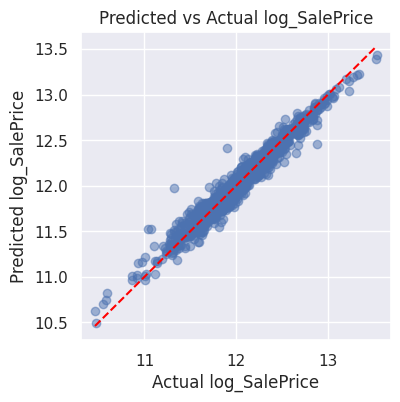

In [96]:
plt.figure(figsize=(4, 4))
plt.scatter(log_SalePrice_train, log_SalePrice_train_pred, alpha=0.5)
plt.plot([min(log_SalePrice_train), max(log_SalePrice_train)], [min(log_SalePrice_train), max(log_SalePrice_train)], color='red', linestyle='--')
plt.title('Predicted vs Actual log_SalePrice')
plt.xlabel('Actual log_SalePrice')
plt.ylabel('Predicted log_SalePrice')
plt.show()

In [97]:
r2_score(log_SalePrice_train, log_SalePrice_train_pred)

0.9587275913165632

In [98]:
score_dataset(X_train, y_train, model)

0.12471026377565388

## Hyperparameter tuning

In [99]:
# search_space = {
#     "n_estimators": [100, 500, 1000],           # number of trees
#     "learning_rate": [0.01, 0.1],               # effect of each tree
#     "max_depth": [3, 5, 7],                     # limit depth to common best performers
#     "min_samples_split": [5, 10],               # smaller range of values
#     "min_samples_leaf": [1, 2],                 # smaller range of values
#     "subsample": [0.8, 1.0],                    # reduce to fewer options
#     "max_features": ['sqrt']                    # only try one common option
# }

# GS = GridSearchCV(estimator=model, param_grid=search_space, scoring=['r2', 'neg_root_mean_squared_error'], refit='neg_root_mean_squared_error', cv=5, verbose=4)
# GS.fit(X_train, np.log(y_train))

In [100]:
# Best parameters:
model = GradientBoostingRegressor(learning_rate=0.01, max_depth=5, max_features='sqrt', min_samples_leaf=2, min_samples_split=10, n_estimators=1000, subsample=0.8)

model.fit(X_train, np.log(y_train))

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, max_features='sqrt',
                          min_samples_leaf=2, min_samples_split=10,
                          n_estimators=1000, subsample=0.8)

In [101]:
log_SalePrice_train_pred = model.predict(X_train)
log_SalePrice_train = np.log(y_train)

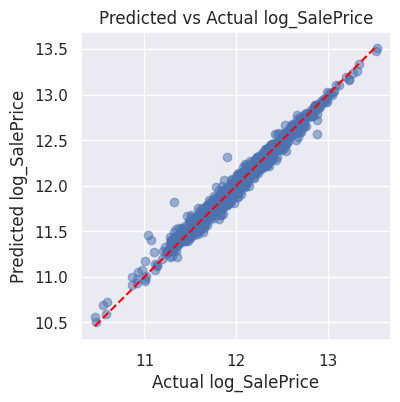

In [102]:
plt.figure(figsize=(4, 4))
plt.scatter(log_SalePrice_train, log_SalePrice_train_pred, alpha=0.5)
plt.plot([min(log_SalePrice_train), max(log_SalePrice_train)], [min(log_SalePrice_train), max(log_SalePrice_train)], color='red', linestyle='--')
plt.title('Predicted vs Actual log_SalePrice')
plt.xlabel('Actual log_SalePrice')
plt.ylabel('Predicted log_SalePrice')
plt.show()

In [103]:
r2_score(log_SalePrice_train, log_SalePrice_train_pred)

0.9792398557783825

In [104]:
score_dataset(X_train, y_train, model)

0.12058492428016533

# Sumbission

In [105]:
test_file_path = "../input/house-prices-advanced-regression-techniques/test.csv"
test_data = pd.read_csv(test_file_path)
ids = test_data.Id

test_data = create_features(test_data, scaler=scaler, pca=pca, test=True)

for colname in test_data.select_dtypes(["category"]):
        test_data[colname] = test_data[colname].cat.codes

preds = np.exp(model.predict(test_data))
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

,Id,SalePrice
0,1461,122522.079361
1,1462,153552.188348
2,1463,182619.433803
3,1464,187860.591871
4,1465,188301.262216


In [106]:
sample_submission_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
sample_submission_df['SalePrice'] = np.exp(model.predict(test_data))
sample_submission_df.to_csv('/kaggle/working/submission.csv', index=False)
sample_submission_df.head()

,Id,SalePrice
0,1461,122522.079361
1,1462,153552.188348
2,1463,182619.433803
3,1464,187860.591871
4,1465,188301.262216
